In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
# Load csv 
df_train = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

# Create new column (Survived) in raw test data with a value of 0 on each row
df_test_raw['Survived'] = 0

In [ ]:
# Show the given row and columns in the datasets
shape_train = df_train.shape
shape_test = df_test_raw.shape
print('Train dataset shape: ')
print(shape_train)
print('Test dataset shape: ')
print(shape_test)

In [ ]:
# Show all info of the datasets
df_train.info()
df_test_raw.info()


In [ ]:
# Show total number of male and female onboard of the ship
df_train['Sex'].value_counts()

In [ ]:
# Show null values per column
df_train.isnull().sum()

In [ ]:
sex = df_train.groupby('Sex')

male_pass = sex.get_group('male')
female_pass = sex.get_group('female')

In [ ]:
# Gives the age thats most common amongst men onboard
male_pass.Age.mode()

In [ ]:
# Shows how many male passengers did not survive
not_surv_male_pass = male_pass[(male_pass['Survived'] == 0)]
not_surv_male_pass.PassengerId.count() # 468


In [ ]:
# Shows how many male passengers did survive
surv_male_pass = male_pass[(male_pass['Survived'] == 1)]
surv_male_pass.PassengerId.count() # 109

In [ ]:
# Group male passengers by survived or not to plot the results
male_pass_graph = male_pass.groupby('Survived').Survived.count()


In [ ]:
# Gives the age thats most common amongst women onboard
female_pass.Age.mode()

In [ ]:
# Shows how many female passengers did not survive
not_surv_female_pass = female_pass[(female_pass['Survived'] == 0)]
not_surv_female_pass.PassengerId.count() # 81

In [ ]:
# Shows how many female passengers did survive
surv_female_pass = female_pass[(female_pass['Survived'] == 1)]
surv_female_pass.PassengerId.count() # 233
list_female_pass_surv = surv_female_pass.PassengerId
array_female_pass_surv = np.array(list_female_pass_surv)
print(array_female_pass_surv)

In [ ]:
# Group female passengers by survived or not to plot the results
female_pass_graph = female_pass.groupby('Survived').Survived.count()

In [109]:
# Total of people who survived
total_surv = df_train[(df_train['Survived'] == 1)]
total_not_surv = df_train[(df_train['Survived'] == 0)]

In [111]:
# Group survivers by sex
groupby_sex_surv = total_surv.groupby('Sex').Survived.count()
groupby_sex_not_surv = total_not_surv.groupby('Sex').Survived.count()

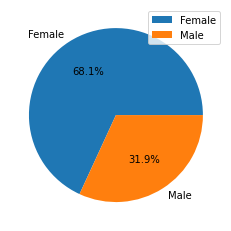

In [106]:
pie_labels = ['Female', 'Male']
plt.pie(groupby_sex_surv, labels=pie_labels, autopct='%1.1f%%')
plt.legend()
plt.show()




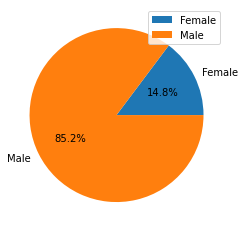

In [112]:
pie_labels = ['Female', 'Male']
plt.pie(groupby_sex_not_surv, labels=pie_labels, autopct='%1.1f%%')
plt.legend()
plt.show()

In [ ]:
# Create new dataframe that only contains de PassengerId and Survived columns
data = df_test_raw[['PassengerId', 'Survived']]

# Display the new dataframe
display(data)

# Create a csv file of the dataframe called result
data.to_csv('result.csv', index=False)

Hieronder code die mogelijk later gebruikt kan worden...

In [ ]:
# newdf = df_train[(df_train['Sex'] == 'male') & (df_train['Pclass'] == 3)]
# male_3 = newdf['Survived'].value_counts()
# tot_male = male_3[0] + male_3[1]
# male_3_lived = newdf[newdf['Survived'] == 1]
# print(male_3_lived)